In [1]:
import os,sys
from importlib import reload
sys.path.append("../tracker")
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib

In [3]:
import tracker.kalmanfilter as KF
import tracker.utilities as Util

In [3]:
# Generated toy hits
N_events=5000

Hit_collection={}
Truth_collection ={}
ParTruth_collection={}

for i in range(N_events):
    Hit_collection[i],Truth_collection[i],ParTruth_collection[i] = \
            Util.hit.gen_hits(x0=0,y0=0,z0=0, t0=0, Ax=0.3,Az=0.2,At=1/30,  N_LAYERS=4)

In [16]:
a=b=c=[1,2,3]

# %timeit -n 100 sp.stats.linregress(a,b)
%timeit -n 100 linregress(a,b)

14.3 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
def linregress(x, y):

    X = np.array(x)
    Y = np.array(y)
    H = np.array([[1,yi-y[0]] for yi in y])


    Error_x = np.linalg.inv(H.T  @ H)
    # Param_x = Error_x @ (H.T  @ X)
    # chi2_x = (X - H@Param_x).T @ (X - H@Param_x)


    return  

In [17]:
1e6/20 *14e-6 * 80

56.0

### Check the result of one event with Kalman/LS

Kalman result [Ax, Az, At]: [22.52014246530598, 15.760786331273266, 2.7814000682184883, 0.3097411512104742, 0.19557409522690605, 0.03328430224279506]
LS fit result [Ax, Az, At]: [22.5173297  15.76187778  2.77995301  0.30973493  0.19558974  0.03327731]


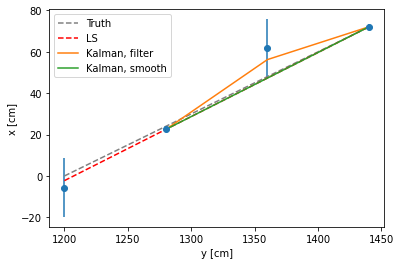

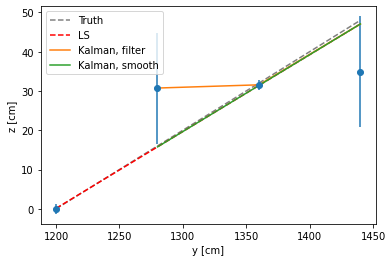

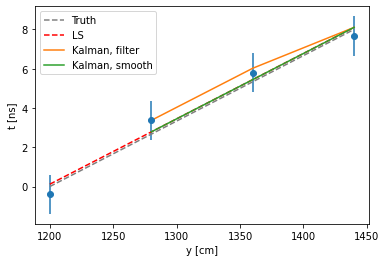

In [4]:
hits = Hit_collection[4]
hits_truth = Truth_collection[0]

# Run Kalman filter
kf = Util.track.run_kf(hits)
# Run LS fit
guess = Util.track.guess_track(hits)
fit_ls = Util.track.fit_track(hits,guess)

print(f"Kalman result [Ax, Az, At]: {fit_ls.values[:]}")
print(f"LS fit result [Ax, Az, At]: {kf.Xsm[0][:]}")

# Digitized hit
hit_x = [hit.x for hit in hits]
hit_y = [hit.y for hit in hits]
hit_z = [hit.z for hit in hits]
hit_t = [hit.t for hit in hits]
hit_x_err = [hit.x_err for hit in hits]
hit_y_err = [hit.y_err for hit in hits]
hit_z_err = [hit.z_err for hit in hits]
hit_t_err = [hit.t_err for hit in hits]

# Truth
hit_truth_x = np.array([hit.x for hit in hits_truth])
hit_truth_y = np.array([hit.y for hit in hits_truth])
hit_truth_z = np.array([hit.z for hit in hits_truth])
hit_truth_t = np.array([hit.t for hit in hits_truth])


# Kalman-Filtred
fit_x = [hit[0] for hit in kf.Xf]
fit_z = [hit[1] for hit in kf.Xf]
fit_t = [hit[2] for hit in kf.Xf]

# Kalman-Smoothed
smooth_x = [hit[0] for hit in kf.Xsm]
smooth_z = [hit[1] for hit in kf.Xsm]
smooth_t = [hit[2] for hit in kf.Xsm]

# LS fit
fit1_res = list(fit_ls.values)
fit_ls_x = fit1_res[0]+fit1_res[3]*(hit_truth_y-hits[1].y)
fit_ls_z = fit1_res[1]+fit1_res[4]*(hit_truth_y-hits[1].y)
fit_ls_t = fit1_res[2]+fit1_res[5]*(hit_truth_y-hits[1].y)




errorbar(hit_y, hit_x, yerr=hit_x_err, fmt="o")
plot(hit_truth_y, hit_truth_x, color="grey", linestyle="--", label="Truth")
plot(hit_truth_y, fit_ls_x,    color="r", linestyle="--", label="LS")
plot(hit_y[1:], fit_x, label="Kalman, filter")
plot(hit_y[1:], smooth_x, label="Kalman, smooth")
xlabel("y [cm]")
ylabel("x [cm]")
legend()
show()

errorbar(hit_y, hit_z, yerr=hit_z_err, fmt="o")
plot(hit_truth_y, hit_truth_z, color="grey", linestyle="--", label="Truth")
plot(hit_truth_y, fit_ls_z,    color="r", linestyle="--", label="LS")
plot(hit_y[1:], fit_z, label="Kalman, filter")
plot(hit_y[1:], smooth_z, label="Kalman, smooth")
xlabel("y [cm]")
ylabel("z [cm]")
legend()
show()

errorbar(hit_y, hit_t, yerr=hit_t_err, fmt="o")
plot(hit_truth_y, hit_truth_t, color="grey", linestyle="--", label="Truth")
plot(hit_truth_y, fit_ls_t,    color="r", linestyle="--", label="LS")
plot(hit_y[1:], fit_t, label="Kalman, filter")
plot(hit_y[1:], smooth_t, label="Kalman, smooth")
xlabel("y [cm]")
ylabel("t [ns]")
legend()
show()

In [9]:
# Performance difference
%timeit -n 10 kf = Util.track.run_kf(hits)
%timeit -n 10 fit_ls = Util.track.fit_track(hits,guess)

229 µs ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.87 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Run more events

In [ ]:
results={}
results["hits_truth"]=[]
results["kf_popt"]=[]
results["kf_perr"]=[]
results["kf_chi2"]=[]
results["ls_popt"]=[]
results["ls_perr"]=[]
results["ls_chi2"]=[]

# for i in range(len(Hit_collection)):
for i in range(1000):
    # Get one event
    hits = Hit_collection[i]
    hits_truth = ParTruth_collection[i]
    results["hits_truth"].append(hits_truth)
    dof = 3*len(hits)-6
    
    
    # Run Kalman filter
    kf = Util.track.run_kf(hits)
    # Run LS fit
    guess = Util.track.guess_track(hits)
    fit1 = Util.track.fit_track(hits,guess)
    
    
    results["kf_popt"].append(kf.Xsm[0])
    results["kf_perr"].append(np.sqrt(np.diag(kf.Csm[0])))
    results["kf_chi2"].append(kf.chift_total)
    
    
    lsfit_values = [fit1.values[0],fit1.values[1],fit1.values[2],fit1.values[3],fit1.values[4],fit1.values[5]]
    lsfit_errors = [fit1.errors[0],fit1.errors[1],fit1.errors[2],fit1.errors[3],fit1.errors[4],fit1.errors[5]]
    results["ls_popt"].append(lsfit_values)
    results["ls_perr"].append(lsfit_errors)
    results["ls_chi2"].append(fit1.fval)

for key in results:
    results[key] = np.array(results[key])

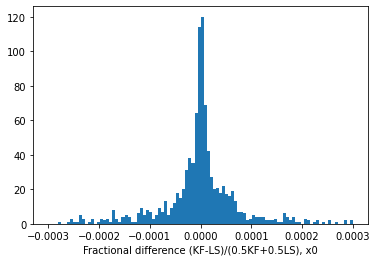

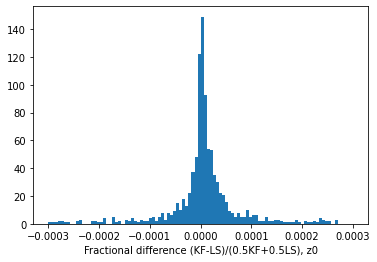

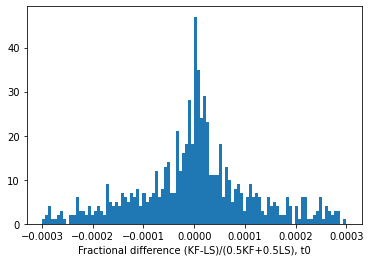

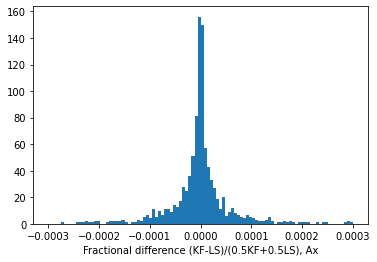

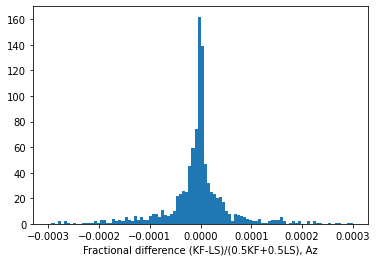

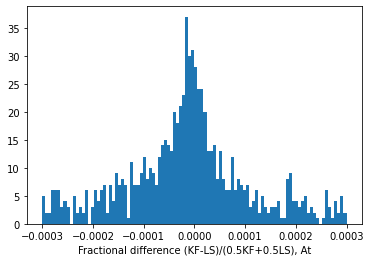

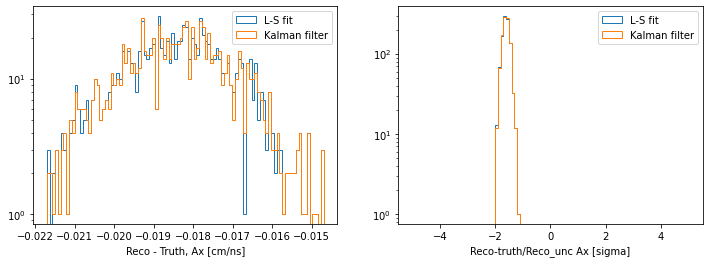

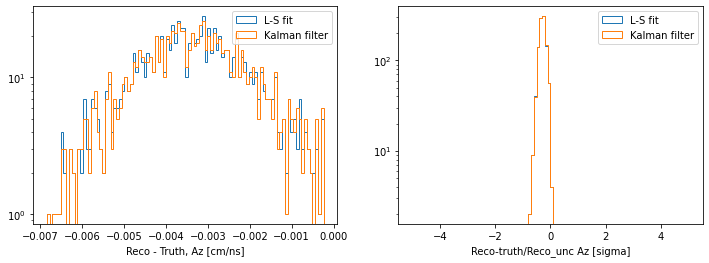

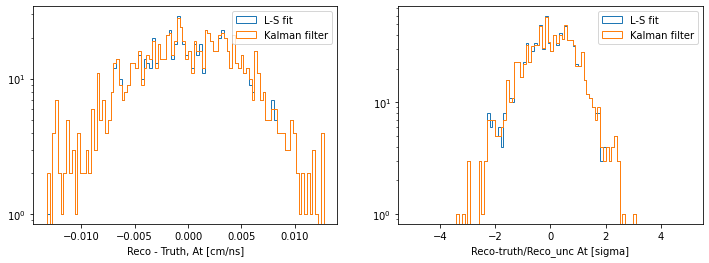

In [ ]:
par_names=['x0','z0', 't0',  'Ax', 'Az', 'At'] # Use real world direction
par_unit= ["[cm]","[cm]",'[ns]',"[cm/ns]","[cm/ns]","[cm/ns]"]
# ranges=[(-20,20),(-20,20),(-20,20),(-20,20),(-30,30),(-30,30),(-30,30)]

for ipar in range(6):
    diff=results["kf_popt"][:,ipar] - results["ls_popt"][:,ipar]
    avg =0.5*(results["kf_popt"][:,ipar] + results["ls_popt"][:,ipar])
    hist(diff/avg,bins=100,range=(-0.0003,0.0003))
    xlabel(f"Fractional difference (KF-LS)/(0.5KF+0.5LS), {par_names[ipar]}")
#     title()

    show()

for ipar in range(3,6):
    #_range=ranges[ipar]
    residual_km=results["kf_popt"][:,ipar]-results["hits_truth"][:,ipar]
    residual_ls=results["ls_popt"][:,ipar]-results["hits_truth"][:,ipar]
    _range=(np.percentile(residual_km,1),np.percentile(residual_km,99))
    
    def pull(x_measure, x_truth, x_unc):
        return (x_measure-x_truth)/x_unc
    pull_ls=pull(residual_ls,0,results["ls_perr"][:,ipar])
    pull_km=pull(residual_km,0,results["kf_perr"][:,ipar])
    
    fig,axs=plt.subplots(1,2,figsize=(12,4))
    plt.sca(axs[0])
    plt.hist(residual_ls,histtype="step",bins=100,range=_range,label="L-S fit");#bins=np.linspace(360,500,100));
    plt.hist(residual_km,histtype="step",bins=100,range=_range,label="Kalman filter");#bins=np.linspace(360,500,100));
    plt.legend()
    plt.xlabel(f"Reco - Truth, {par_names[ipar]} {par_unit[ipar]}")
    plt.yscale("log")
    plt.sca(axs[1])
    plt.hist(pull_ls,histtype="step",bins=100,range=(-5,5),label="L-S fit");#bins=np.linspace(360,500,100));
    plt.hist(pull_km,histtype="step",bins=100,range=(-5,5),label="Kalman filter");#bins=np.linspace(360,500,100));
    plt.legend()
    plt.xlabel(f"Reco-truth/Reco_unc {par_names[ipar]} [sigma]")
    plt.yscale("log")    
    
    
    plt.show()

## Run on an event that failed in the tracker

In [276]:
x = [241.62934581783023, 259.25, 221.49664808213277, 227.75]
y = [9894.0, 9975.599999999999, 10057.2, 10138.8]
z = [12456.75, 12450.5, 12461.25, 12450.5]
t = [40.91365706617539, 45.79668867914941, 48.189471653643565, 50.295569678622876]
layers = [0,1,2,3,]

hits = Util.hit.make_hits(x,y,z,t,layers)

In [277]:
reload(Util)
reload(KF)

<module 'kalmanfilter' from '../tracker\\kalmanfilter.py'>

Kalman result [Ax, Az, At]: [258.6909746299789, 12458.902027177915, 44.77182700226311, -0.1892800516149613, 0.026118508468165658, 0.037435706819755096]
LS fit result [Ax, Az, At]: [ 2.58691022e+02  1.24589004e+04  4.47724565e+01 -1.89280756e-01
  2.61290775e-02  3.74197331e-02]
Kalman filter chi2 [0, 10.825644274419714, 3.508517220459168]
Kalman smoother chi2 [11.486460508484113, 4.24254119906052, 0]


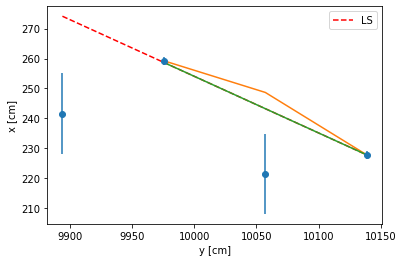

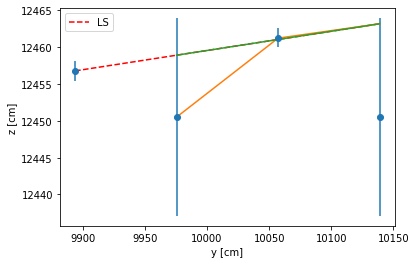

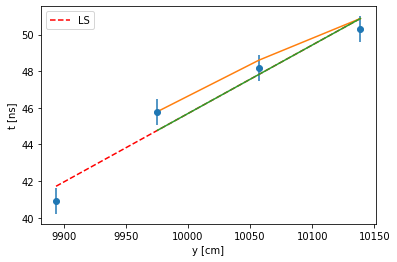

In [278]:
# hits = Hit_collection[4]
# hits_truth = Truth_collection[0]

# Run Kalman filter
kf = Util.track.run_kf(hits, multiple_scattering=False)
# kf = Util.track.run_kf(hits, multiple_scattering=True)
# Run LS fit
guess = Util.track.guess_track(hits)
fit_ls = Util.track.fit_track(hits,guess)

print(f"Kalman result [Ax, Az, At]: {fit_ls.values[:]}")
print(f"LS fit result [Ax, Az, At]: {kf.Xsm[0][:]}")

print("Kalman filter chi2", kf.chift)
print("Kalman smoother chi2", kf.chism)

# Digitized hit
hit_x = [hit.x for hit in hits]
hit_y = [hit.y for hit in hits]
hit_z = [hit.z for hit in hits]
hit_t = [hit.t for hit in hits]
hit_x_err = [hit.x_err for hit in hits]
hit_y_err = [hit.y_err for hit in hits]
hit_z_err = [hit.z_err for hit in hits]
hit_t_err = [hit.t_err for hit in hits]

# Truth
# hit_truth_x = np.array([hit.x for hit in hits_truth])
hit_truth_y = np.array(hit_y)
# hit_truth_z = np.array([hit.z for hit in hits_truth])
# hit_truth_t = np.array([hit.t for hit in hits_truth])


# Kalman-Filtred
fit_x = [hit[0] for hit in kf.Xf]
fit_z = [hit[1] for hit in kf.Xf]
fit_t = [hit[2] for hit in kf.Xf]

# Kalman-Smoothed
smooth_x = [hit[0] for hit in kf.Xsm]
smooth_z = [hit[1] for hit in kf.Xsm]
smooth_t = [hit[2] for hit in kf.Xsm]

# LS fit
fit1_res = list(fit_ls.values)
fit_ls_x = fit1_res[0]+fit1_res[3]*(hit_truth_y-hits[1].y)
fit_ls_z = fit1_res[1]+fit1_res[4]*(hit_truth_y-hits[1].y)
fit_ls_t = fit1_res[2]+fit1_res[5]*(hit_truth_y-hits[1].y)




errorbar(hit_y, hit_x, yerr=hit_x_err, fmt="o")
plot(hit_truth_y, fit_ls_x,    color="r", linestyle="--", label="LS")
plot(hit_y[1:], fit_x)
plot(hit_y[1:], smooth_x)
xlabel("y [cm]")
ylabel("x [cm]")
legend()
show()

errorbar(hit_y, hit_z, yerr=hit_z_err, fmt="o")
plot(hit_truth_y, fit_ls_z,    color="r", linestyle="--", label="LS")
plot(hit_y[1:], fit_z)
plot(hit_y[1:], smooth_z)
xlabel("y [cm]")
ylabel("z [cm]")
legend()
show()

errorbar(hit_y, hit_t, yerr=hit_t_err, fmt="o")
plot(hit_truth_y, fit_ls_t,    color="r", linestyle="--", label="LS")
plot(hit_y[1:], fit_t)
plot(hit_y[1:], smooth_t)
xlabel("y [cm]")
ylabel("t [ns]")
legend()
show()

In [20]:
sin_theta=0.8

In [21]:
L_Al =  0.6
L_Sc = 1.0 # [cm] Scintillator
L_r_Al = 24.0111/2.7; # [cm] Radiation length Aluminum/ density of Aluminum
L_r_Sc = 43; # [cm] Radiation length Scintillator (Saint-Gobain paper)

L_rad = L_Al / L_r_Al + L_Sc / L_r_Sc; # [rad lengths] orthogonal to Layer
L_rad /= sin_theta; # [rad lengths] in direction of track

sigma_ms = 13.6 * np.sqrt(L_rad) * (1 + 0.038 * np.log(L_rad)); #
sigma_ms /= 500 # [MeV] Divided by 500 MeV

# Q = Q * np.power(sigma_ms, 2); # Scattering contribution to process noise

In [42]:
# tracks=joblib.load("hits_example_group.joblib")
# hits=tracks[59]
hits=joblib.load("hits_example.joblib")

In [44]:
import trackfinder as TF

## Run forward vs backward

### Multiple scattering off

In [68]:
x = [241.62934581783023, 259.25, 221.49664808213277, 227.75]
y = [9894.0, 9975.599999999999, 10057.2, 10138.8]
z = [12456.75, 12450.5, 12461.25, 12450.5]
t = [40.91365706617539, 45.79668867914941, 48.189471653643565, 50.295569678622876]
layers = [0,1,2,3,]

hits_original = Util.hit.make_hits(x,y,z,t,layers)
hits = hits_original[::-1]
multiple_scattering = False

kf_original = Util.track.run_kf(hits_original, multiple_scattering=multiple_scattering)


In [69]:

kf = KF.KalmanFilter()

# Set initial state using first two hits
m0, V0, H0, Xf0, Cf0, Rf0 = Util.track.init_state(hits) # Use the first two hits to initiate
kf.init_filter( m0, V0, H0, Xf0, Cf0, Rf0)


# Feed all measurements to KF
for i in range(2,len(hits)):   
    # get updated matrix
    hit = hits[i]
    dy  = hits[i].y-hits[i-1].y

    # If you don't need multiple scattering:
    if not multiple_scattering: 
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy)
    # Or, use this 
    else:
        Ax, Az, At = kf.Xf[-1][3:]
        velocity = [Ax, Az, At]
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy, velocity=velocity)
    
    # pass to KF
    kf.forward_predict(mi, Vi, Hi, Fi, Qi)
    kf.forward_filter()

In [93]:
Ax, Az, At = kf_original.Xsm[0][3:]
velocity = [Ax, Az, At]      if multiple_scattering else None
hits_found = hits_original
mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hits_found[0], hits_found[0].y - hits_found[1].y, velocity=velocity)
state_predicted_step_0 = Fi@kf_original.Xsm[0]
statecov_predicted_step_0 = Fi@kf_original.Csm[0]@Fi.T #+ Qi 

print("Smoothed state \t",kf_original.Xsm[1])
print("Backward Kalman",kf.Xf[-3],'\n')


print("Smoothed state \t",kf_original.Xsm[0])
print("Backward Kalman",kf.Xf[-2],'\n')

print("Smooth, extrapolate\t",state_predicted_step_0)
print("Backward Kalman \t",kf.Xf[-1],'\n')

Smoothed state 	 [ 2.43270334e+02  1.24610536e+04  4.78257728e+01 -1.89640181e-01
  2.62589060e-02  3.74246579e-02]
Backward Kalman [ 2.21496648e+02  1.24612500e+04  4.81894717e+01  7.66342147e-02
 -1.31740196e-01  2.58100248e-02] 

Smoothed state 	 [ 2.58744973e+02  1.24589108e+04  4.47719207e+01 -1.89640181e-01
  2.62589060e-02  3.74246579e-02]
Backward Kalman [ 2.59157436e+02  1.24610714e+04  4.58444695e+01 -1.93014706e-01
 -5.55111512e-17  2.75666728e-02] 

Smooth, extrapolate	 [ 2.74219612e+02  1.24567681e+04  4.17180686e+01 -1.89640181e-01
  2.62589060e-02  3.74246579e-02]
Backward Kalman 	 [ 2.74219612e+02  1.24567681e+04  4.17180686e+01 -1.89640181e-01
  2.62589060e-02  3.74246579e-02] 



### Multiple scattering on

In [103]:
from datatypes import *

In [258]:
# x = [241.62934581783023, 259.25, 221.49664808213277, 227.75]
# y = [9894.0, 9975.599999999999, 10057.2, 10138.8]
# z = [12456.75, 12450.5, 12461.25, 12450.5]
# t = [40.91365706617539, 45.79668867914941, 48.189471653643565, 50.295569678622876]
# layers = [0,1,2,3,]

# hits_original = Util.hit.make_hits(x,y,z,t,layers)


hits_original = [Hit(x=1322.5910104085096, y=9893.0, z=9191.25, t=41.15713124574732, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=30),
 Hit(x=1277.25, y=9974.2, z=9289.840324723467, t=44.969764723500894, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=31),
 Hit(x=1204.2834426719878, y=10055.400000000001, z=9362.25, t=48.01032969161862, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=32),
 Hit(x=1164.75, y=10136.599999999999, z=9449.5, t=53.361135084334165, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=5, ind=33)]

# hits_original = [Hit(x=1369.2921263336486, y=9893.0, z=9105.75, t=38.07120197536655, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=6),
#  Hit(x=1308.75, y=9974.2, z=9212.62094025211, t=42.25551119361359, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=7),
#  Hit(x=1250.5155874332293, y=10055.400000000001, z=9258.75, t=47.43498053330287, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=8),
#  Hit(x=1205.25, y=10136.599999999999, z=9342.219937977183, t=48.673560557262455, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=5, ind=9)]

hits = hits_original[::-1]
multiple_scattering = True

kf_original = Util.track.run_kf(hits_original, multiple_scattering=multiple_scattering)


In [259]:

kf = KF.KalmanFilter()

# Set initial state using first two hits
m0, V0, H0, Xf0, Cf0, Rf0 = Util.track.init_state(hits) # Use the first two hits to initiate
kf.init_filter( m0, V0, H0, Xf0, Cf0, Rf0)


# Feed all measurements to KF
for i in range(2,len(hits)):   
    # get updated matrix
    hit = hits[i]
    dy  = hits[i].y-hits[i-1].y

    # If you don't need multiple scattering:
    if not multiple_scattering: 
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy)
    # Or, use this 
    else:
        Ax, Az, At = kf.Xf[-1][3:]
        velocity = [Ax, Az, At]
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy, velocity=velocity)
    
    # pass to KF
    kf.forward_predict(mi, Vi, Hi, Fi, Qi)
    kf.forward_filter()

In [256]:
# Backward Kalman 	 [ 1.33317132e+03  9.19130336e+03  4.09268632e+01 -6.91476225e-01
#   1.05314472e+00  4.88302762e-02] 

# Backward Kalman 	 [ 1.36067229e+03  9.10586026e+03  3.85608240e+01 -6.38319166e-01
#   9.42888801e-01  4.55500759e-02] 

In [260]:
Ax, Az, At = kf_original.Xsm[0][3:]
velocity = [Ax, Az, At]      if multiple_scattering else None
hits_found = hits_original
mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hits_found[0], hits_found[0].y - hits_found[1].y, velocity=velocity)
state_predicted_step_0 = Fi@kf_original.Xsm[0]
statecov_predicted_step_0 = Fi@kf_original.Csm[0]@Fi.T #+ Qi 

Xp_i = state_predicted_step_0
Cp_i = statecov_predicted_step_0
rp_i = mi - Hi@Xp_i
Rp_i = Vi + Hi@Cp_i@Hi.T
# Kalman Gain K
K = Cp_i.dot(Hi.T).dot(inv(Rp_i))
# Filtered State
Xf = Xp_i + K@rp_i# Combination of the predicted state, measured values, covariance matrix and Kalman Gain
Cf = (np.identity(len(Xf)) - K@Hi).dot(Cp_i)

print("Smoothed state \t",kf_original.Xsm[1])
print("Backward Kalman",kf.Xf[-3],'\n')


print("Smoothed state \t",kf_original.Xsm[0])
print("Backward Kalman",kf.Xf[-2],'\n')

print("Smooth, extrapolate\t",state_predicted_step_0)
print("Smooth, ext-filtered\t",Xf)
print("Backward Kalman \t",kf.Xf[-1],'\n')

Smoothed state 	 [ 1.21960340e+03  9.36234129e+03  4.82124504e+01 -6.75548574e-01
  1.04686126e+00  6.23152134e-02]
Backward Kalman [ 1.20428344e+03  9.36225000e+03  4.80103297e+01 -4.86865058e-01
  1.07450739e+00  6.58966181e-02] 

Smoothed state 	 [ 1.27701001e+03  9.27682144e+03  4.46831686e+01 -7.08623500e-01
  1.05318043e+00  4.18997465e-02]
Backward Kalman [ 1.27717183e+03  9.28256675e+03  4.46441045e+01 -6.95972900e-01
  1.02479650e+00  1.37837315e-02] 

Smooth, extrapolate	 [ 1.33455024e+03  9.19130319e+03  4.12809091e+01 -7.08623500e-01
  1.05318043e+00  4.18997465e-02]
Smooth, ext-filtered	 [ 1.33335205e+03  9.19127251e+03  4.12258572e+01 -6.95568976e-01
  1.05342778e+00  4.21065486e-02]
Backward Kalman 	 [ 1.32899257e+03  9.19128852e+03  4.11855115e+01 -6.37040527e-01
  1.07079798e+00  4.52793462e-02] 



In [135]:
tr1 = [ 1.32799669e+03,0,  9.19128595e+03,  4.11878678e+01, -6.24193459e-01,
  1.07255405e+00,  4.69098977e-02] 
tr2 = [ 1.36284452e+03,0,  9.10587459e+03,  3.80628723e+01, -6.67743434e-01,
  9.22830139e-01,  5.83438763e-02] 

# tr1= [ 1.33317132e+03 , 9.19130336e+03 , 4.09268632e+01, -6.91476225e-01,   1.05314472e+00,  4.88302762e-02] 
# tr2= [ 1.36067229e+03 , 9.10586026e+03 , 3.85608240e+01, -6.38319166e-01,   9.42888801e-01,  4.55500759e-02]   

tr1 = np.array([tr1[0], 0, tr1[1], tr1[3]/tr1[5], 1/tr1[5], tr1[4]/tr1[5], tr1[2]])
tr2 = np.array([tr2[0], 0, tr2[1], tr2[3]/tr2[5], 1/tr2[5], tr2[4]/tr2[5], tr2[2]])

Util.track.closest_approach_midpoint(tr1, tr2)

(array([-46556.79209577,  -1210.77189539,    783.16664045,   7944.19953604]),
 150.10078566255913)

## Run backward, forward, and then backward

In [275]:
kf = Util.track.run_kf(hits_original[::-1])
Xf0 = kf.Xf[-1]
Cf0 = kf.Cf[-1]
print(Xf0)

for i in range(200):
    kf = Util.track.run_kf(hits_original, initial_state=Xf0, initial_cov=Cf0, multiple_scattering=True)
    # Xf0 = 0.5*(Xf0+kf.Xsm[0])
    Xf0 = kf.Xsm[0]
    Cf0 = kf.Csm[0]*1.2
    print(i, Xf0)
    print("   ", np.diag(Cf0))  



[ 1.33317132e+03  9.19130336e+03  4.09268632e+01 -6.91476225e-01
  1.05314472e+00  4.88302762e-02]
0 [ 1.33336986e+03  9.19135471e+03  4.09571778e+01 -6.92399651e-01
  1.05336217e+00  4.87378679e-02]
    [2.75449837e+00 2.00638150e+00 3.47923006e-01 1.13990759e-04
 1.37503833e-04 1.73509727e-05]
1 [ 1.33345874e+03  9.19141634e+03  4.09777697e+01 -6.92854333e-01
  1.05341970e+00  4.86662098e-02]
    [2.28210564e+00 2.39458831e+00 3.53036652e-01 1.17878625e-04
 1.52614036e-04 1.99956222e-05]
2 [ 1.33351259e+03  9.19148987e+03  4.09927783e+01 -6.93153927e-01
  1.05332197e+00  4.86019161e-02]
    [2.08621092e+00 2.85499715e+00 3.63905548e-01 1.28601426e-04
 1.71050562e-04 2.31809049e-05]
3 [ 1.33355033e+03  9.19157720e+03  4.10046044e+01 -6.93381281e-01
  1.05307799e+00  4.85373858e-02]
    [2.01933361e+00 3.39983198e+00 3.80018062e-01 1.44047114e-04
 1.93194721e-04 2.69989778e-05]
4 [ 1.33357932e+03  9.19168048e+03  4.10147121e+01 -6.93571092e-01
  1.05268988e+00  4.84676733e-02]
    [2.0

In [241]:
def get_speed(state):
    Xf0=state
    v = Xf0[3]/Xf0[5], 1/Xf0[5], Xf0[4]/Xf0[5]

    return v, np.linalg.norm(v)

get_speed(Xf0)

((-9.780241850940918, 14.876266403341427, 11.446372667651792),
 21.165440699707794)

In [220]:

kf = KF.KalmanFilter()

# Set initial state using first two hits
m0, V0, H0, Xf0, Cf0, Rf0 = Util.track.init_state(hits) # Use the first two hits to initiate
kf.init_filter( m0, V0, H0, Xf0, Cf0, Rf0)


# Feed all measurements to KF
for i in range(2,len(hits)):   
    # get updated matrix
    hit = hits[i]
    dy  = hits[i].y-hits[i-1].y

    # If you don't need multiple scattering:
    if not multiple_scattering: 
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy)
    # Or, use this 
    else:
        Ax, Az, At = kf.Xf[-1][3:]
        velocity = [Ax, Az, At]
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy, velocity=velocity)
    
    # pass to KF
    kf.forward_predict(mi, Vi, Hi, Fi, Qi)
    kf.forward_filter()


#########################################################
kf2 = KF.KalmanFilter()

m0, V0, H0, Xf0, Cf0, Rf0 = Util.track.init_state(hits_original) # Use the first two hits to initiate
Xf0 = kf.Xf[-1] #overwrite initial state and covariance
Cf0 = kf.Cf[-1]
kf2.init_filter( m0, V0, H0, Xf0, Cf0, Rf0)

# Feed all measurements to KF
for i in range(1,len(hits)):   
    # get updated matrix
    hit = hits_original[i]
    dy  = hits_original[i].y-hits_original[i-1].y

    # If you don't need multiple scattering:
    if not multiple_scattering: 
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy)
    # Or, use this 
    else:
        Ax, Az, At = kf2.Xf[-1][3:]
        velocity = [Ax, Az, At]
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy, velocity=velocity)
    
    # pass to KF
    kf2.forward_predict(mi, Vi, Hi, Fi, Qi)
    kf2.forward_filter()


#########################################################
kf3 = KF.KalmanFilter()

m0, V0, H0, Xf0, Cf0, Rf0 = Util.track.init_state(hits) # Use the first two hits to initiate
Xf0 = kf2.Xf[-1] #overwrite initial state and covariance
Cf0 = kf2.Cf[-1]
kf3.init_filter( m0, V0, H0, Xf0, Cf0, Rf0)

# Feed all measurements to KF
for i in range(1,len(hits)):   
    # get updated matrix
    hit = hits[i]
    dy  = hits[i].y-hits[i-1].y

    # If you don't need multiple scattering:
    if not multiple_scattering: 
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy)
    # Or, use this 
    else:
        Ax, Az, At = kf3.Xf[-1][3:]
        velocity = [Ax, Az, At]
        mi, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy, velocity=velocity)
    
    # pass to KF
    kf3.forward_predict(mi, Vi, Hi, Fi, Qi)
    kf3.forward_filter()    





In [221]:
kf3.Xf[-1]

array([ 1.35986665e+03,  9.10587349e+03,  3.81008873e+01, -6.30897180e-01,
        9.38398791e-01,  5.49824647e-02])

# Try to run KF with Infinite initial covariance

In [180]:
reload(KF)

<module 'kalmanfilter' from '../tracker\\kalmanfilter.py'>

In [183]:
kf_find = KF.KalmanFilterFind()

m0 = [0,0,0]
Xf0 = [0, 0, 0, 1, 2, 3]
Cf0 = np.ones((len(Xf0),len(Xf0)))*1e12 + np.diag([1e29]*len(Xf0)) #+ np.random.normal()
V0 = None
H0 = None
Rf0 = None
kf_find.init_filter(m0, V0, H0, Xf0, Cf0, Rf0)

In [184]:
step_pre = 0
for i in range(len(hits)):
    print(i)
    hit = hits[i]
    step_this = hit.y
    dy = step_this-step_pre

    Ax, Az, At = kf_find.Xf[3:]
    velocity = [Ax, Az, At]
    _, Vi, Hi, Fi, Qi = Util.track.add_measurement(hit, dy, velocity=velocity)
    kf_find.update_matrix(Vi, Hi, Fi, Qi) # pass matrices to KF
    kf_find.forward_filter(np.array([hit.x, hit.z, hit.t]))
    print(kf_find.Xf)


0
[1.20525000e+03 9.34221994e+03 4.86735606e+01 1.18900823e-01
 9.21632504e-01 4.80179311e-03]
1
[ 1.25051559e+03  9.25875000e+03  4.74349805e+01  4.50161977e-03
 -8.30100622e-03 -1.23175610e-04]
2
[ 1.30875000e+03  9.21262094e+03  4.22555112e+01  4.50161975e-03
 -8.30100622e-03 -1.23175748e-04]
3
[ 1.36928769e+03  9.10574965e+03  3.80711710e+01  6.01468450e-03
 -1.08100311e-02 -6.86636091e-04]


In [178]:
kf = Util.track.run_kf(hits,multiple_scattering=False)
kf.Xf

[array([ 1.25051559e+03,  9.25875000e+03,  4.74349805e+01, -5.57457973e-01,
         1.02795490e+00,  1.52534486e-02]),
 array([ 1.30871973e+03,  9.19430038e+03,  4.29123577e+01, -6.37272602e-01,
         7.97944703e-01,  3.95188409e-02]),
 array([ 1.36067229e+03,  9.10586026e+03,  3.85608240e+01, -6.38319166e-01,
         9.42888801e-01,  4.55500759e-02])]